In [1]:
import numpy as np
import pydicom as dcm
import matplotlib.pyplot as plt

In [2]:
## load dicom image file for both positive and negative instances
pos_dcm = dcm.dcmread("../sample_data/test.dcm")

In [3]:
def dcm_bit_standardize(dcm):
    x = dcm.pixel_array + 1000
    px_mode = 4096
    x[x >= px_mode] = x[x >= px_mode] - px_mode
    dcm.PixelData = x.tobytes()
    dcm.RescaleIntercept = -1000

In [4]:
def window_image(dcm, window_center, window_width):
    if (dcm.BitsStored == 12) and (dcm.PixelRepresentation == 0) and (int(dcm.RescaleIntercept) > -100):
        print("Bit Standardization")
        dcm_bit_standardize(dcm)

    img = dcm.pixel_array * dcm.RescaleSlope + dcm.RescaleIntercept
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    img = np.clip(img, img_min, img_max)

    return img

### Brain Window Visualization

#### Positive Instance

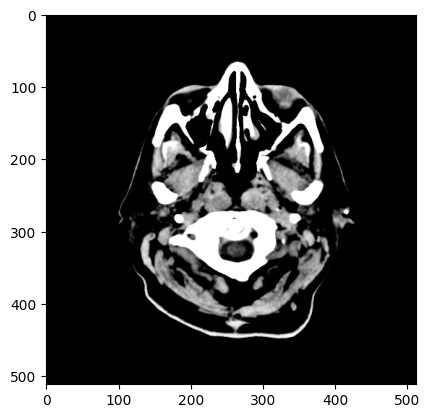

In [5]:
## visualize dicom image instance in brain window
pos_brain = window_image(pos_dcm, 40, 80)
plt.imshow(pos_brain, cmap=plt.cm.gray)

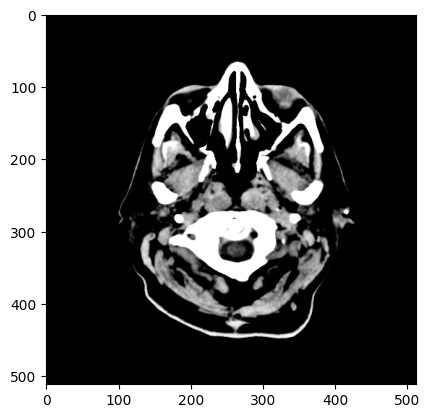

In [6]:
## visualize normalized brain window image
norm_pos_brain = (pos_brain - 0) / 80
plt.imshow(norm_pos_brain, cmap=plt.cm.gray)

### Subdural Window Visualization

#### Positive Instance

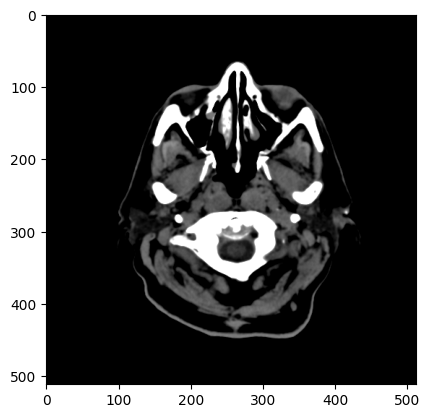

In [7]:
## visualize dicom image instance in subdural window
pos_subdural = window_image(pos_dcm, 80, 200)
plt.imshow(pos_subdural, cmap=plt.cm.gray)

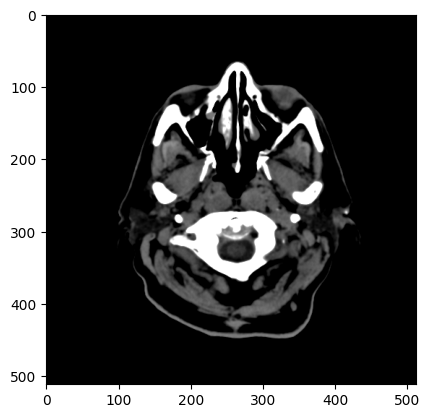

In [8]:
## visualize normalized subdural window image
norm_pos_subdural = (pos_subdural - (-20)) / 200
plt.imshow(norm_pos_subdural, cmap=plt.cm.gray)

### Soft Tissue Window Visualization

#### Positive Instance

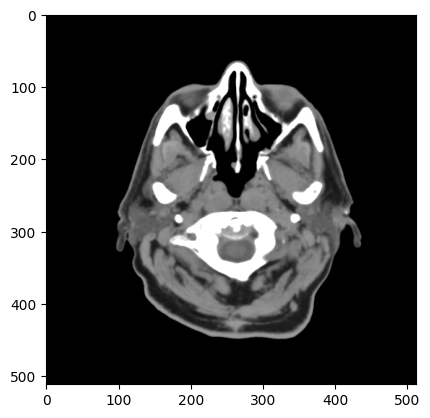

In [9]:
## visualize dicom image instance in soft tissue window
pos_soft = window_image(pos_dcm, 40, 380)
plt.imshow(pos_soft, cmap=plt.cm.gray)

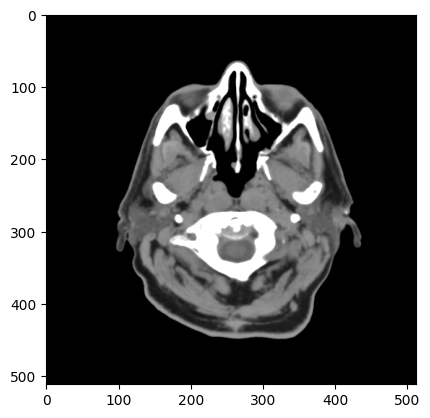

In [10]:
## visualize normalized soft tissue window image
norm_pos_soft= (pos_soft - (-150)) / 380
plt.imshow(norm_pos_soft, cmap=plt.cm.gray)

In [11]:
def channel_combine(dcm):
    brain_img = window_image(dcm, 40, 80)
    subdural_img = window_image(dcm, 80, 200)
    soft_img = window_image(dcm, 40, 380)

    brain_img = (brain_img - 0) / 80
    subdural_img = (subdural_img - (-20)) / 200
    soft_img = (soft_img - (-150)) / 380
    
    combined_img = np.array([brain_img, subdural_img, soft_img]).transpose(1, 2, 0)

    return combined_img

### Positive Instance

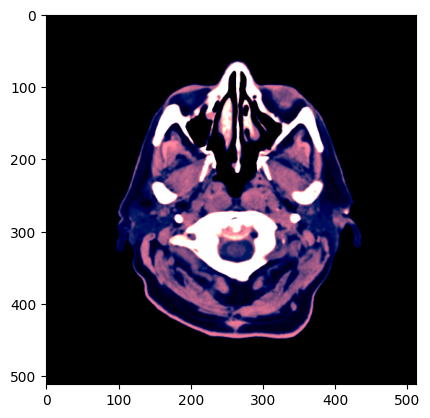

In [12]:
## Visualize the combined channel Image
pos_combined = channel_combine(pos_dcm)
plt.imshow(pos_combined, cmap=plt.cm.gray)

#### Image Blurring - Gaussian Blurring

In [13]:
from scipy.ndimage.filters import gaussian_filter
brain_blurred = gaussian_filter(norm_pos_brain, sigma=4)
soft_blurred = gaussian_filter(norm_pos_soft, sigma=4)
subdural_blurred = gaussian_filter(norm_pos_subdural, sigma=4)

/var/folders/z4/0gxn6x712rg5g4tk99_x4d3r0000gr/T/ipykernel_58356/3681236864.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [14]:
combined_blurred = np.array([brain_blurred, subdural_blurred, soft_blurred]).transpose(1, 2, 0)

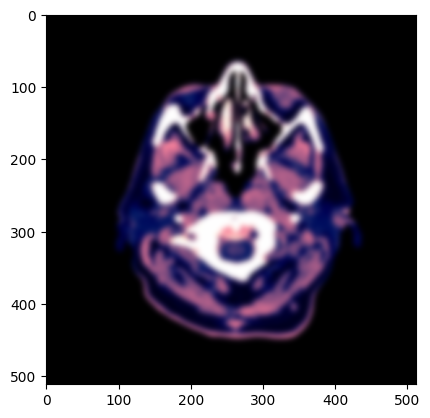

In [15]:
plt.imshow(combined_blurred)